In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_context('talk')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%config InlineBackend.figure_format = 'retina'
from datetime import timedelta
import datetime as dt
import scipy
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter


from get_data.get_data import *

from get_data.get_data_othercountries import *


from rogan_gladen.mk_hpd import mk_hpd
from rogan_gladen.mk_true_positive import mk_true_positive


from get_plots import plot_fpr,mirrorplot_withtest,mirrorplot




# Choose country and download data

In [2]:
ecdc_data=get_ecdc_data(continent='Europe')
ecdc_europe=ecdc_data.groupby(by='date',as_index=False).sum()
ecdc_europe.deaths.clip(0,inplace=True)
ecdc_europe['state']='Europe'
ecdc_europe['datasource']='ecdc.europa.eu'
# Get EU/EEA & UK Tests

from get_data.get_data_ecdc import get_data_ecdc_tests

EUtestdf=get_data_ecdc_tests()

# Get other data only for only EU/EEA & UK 
ecdc_EUtest=ecdc_data[ecdc_data.state.isin(list(EUtestdf.country.unique()))]

#from pprint import pprint
countries=(str(ecdc_EUtest.state.unique())).strip('[]')
print('EU cases & deaths: Countries in this data set:\n', countries)

ecdc_EUtest=ecdc_EUtest.groupby(by='date',as_index=False).sum()
ecdc_EUtest.deaths.clip(0,inplace=True)
ecdc_EUtest['state']='EU/EEA & UK'
ecdc_EUtest['datasource']='ecdc.europa.eu'
ecdc_EUtest['positive_avg']=ecdc_EUtest.positive.rolling(win_type='gaussian',center=True,window=7).mean(std=3)

print('EU tests: Countries in this data set:\n', (str(EUtestdf.country.unique())).strip('[]'))

#EUtest['date']=pd.to_datetime(EUtest.date)
EUtest=EUtestdf.groupby('year_week',as_index=False).sum()

#(EUtest['year_week'].apply(str)).strip()

EUtest['date']=pd.to_datetime(EUtestdf.year_week.add('-0'), format='%Y-W%W-%w')-dt.timedelta(5)

from dataframe_utilities import ECDC_week2day

EUtestdaily=ECDC_week2day(EUtest,'tests_done','dailytests')
EUtestdaily['dailytestsavg']=EUtestdaily.dailytests.rolling(win_type='gaussian',center=True,window=7).mean(std=3)

EU cases & deaths: Countries in this data set:
 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden' 'United Kingdom'
EU tests: Countries in this data set:
 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden' 'United Kingdom'


In [22]:
df=pd.merge(EUtestdaily,ecdc_EUtest,on='date',how='outer')#.reset_index(drop=True)
df.sort_values(by='date',inplace=True)
df.rename(columns={'dailytests':'total'},inplace=True)
df.reset_index(drop=True,inplace=True)

In [23]:
df

,date,total,dailytestsavg,positive,deaths,state,datasource,positive_avg
0,2019-12-31,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
1,2020-01-01,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
2,2020-01-02,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
3,2020-01-03,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,0.000000
4,2020-01-04,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,0.000000
...,...,...,...,...,...,...,...,...
290,2020-10-16,NaN,NaN,133552,948,EU/EEA & UK,ecdc.europa.eu,114278.984962
291,2020-10-17,NaN,NaN,113292,792,EU/EEA & UK,ecdc.europa.eu,116355.588585
292,2020-10-18,NaN,NaN,112240,665,EU/EEA & UK,ecdc.europa.eu,NaN
293,2020-10-19,NaN,NaN,138776,781,EU/EEA & UK,ecdc.europa.eu,NaN


In [ ]:
#df=get_data_Germany()

In [24]:
country=df.state.unique()[0]
datasource=df.datasource.unique()[0]

# df.sort_values(by='date',inplace=True)
# df.reset_index(drop=True,inplace=True)
# df['positive_avg']=df.positive.rolling(win_type='gaussian',center=True,window=7).mean(std=3)
# df['dailytests']=df.total
# df['dailytestsavg']=df.dailytests.rolling(win_type='gaussian',center=True,window=7).mean(std=3)

In [ ]:
df.columns

/Users/ivandebono/Desktop/Covid19Toolkit/get_plots.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


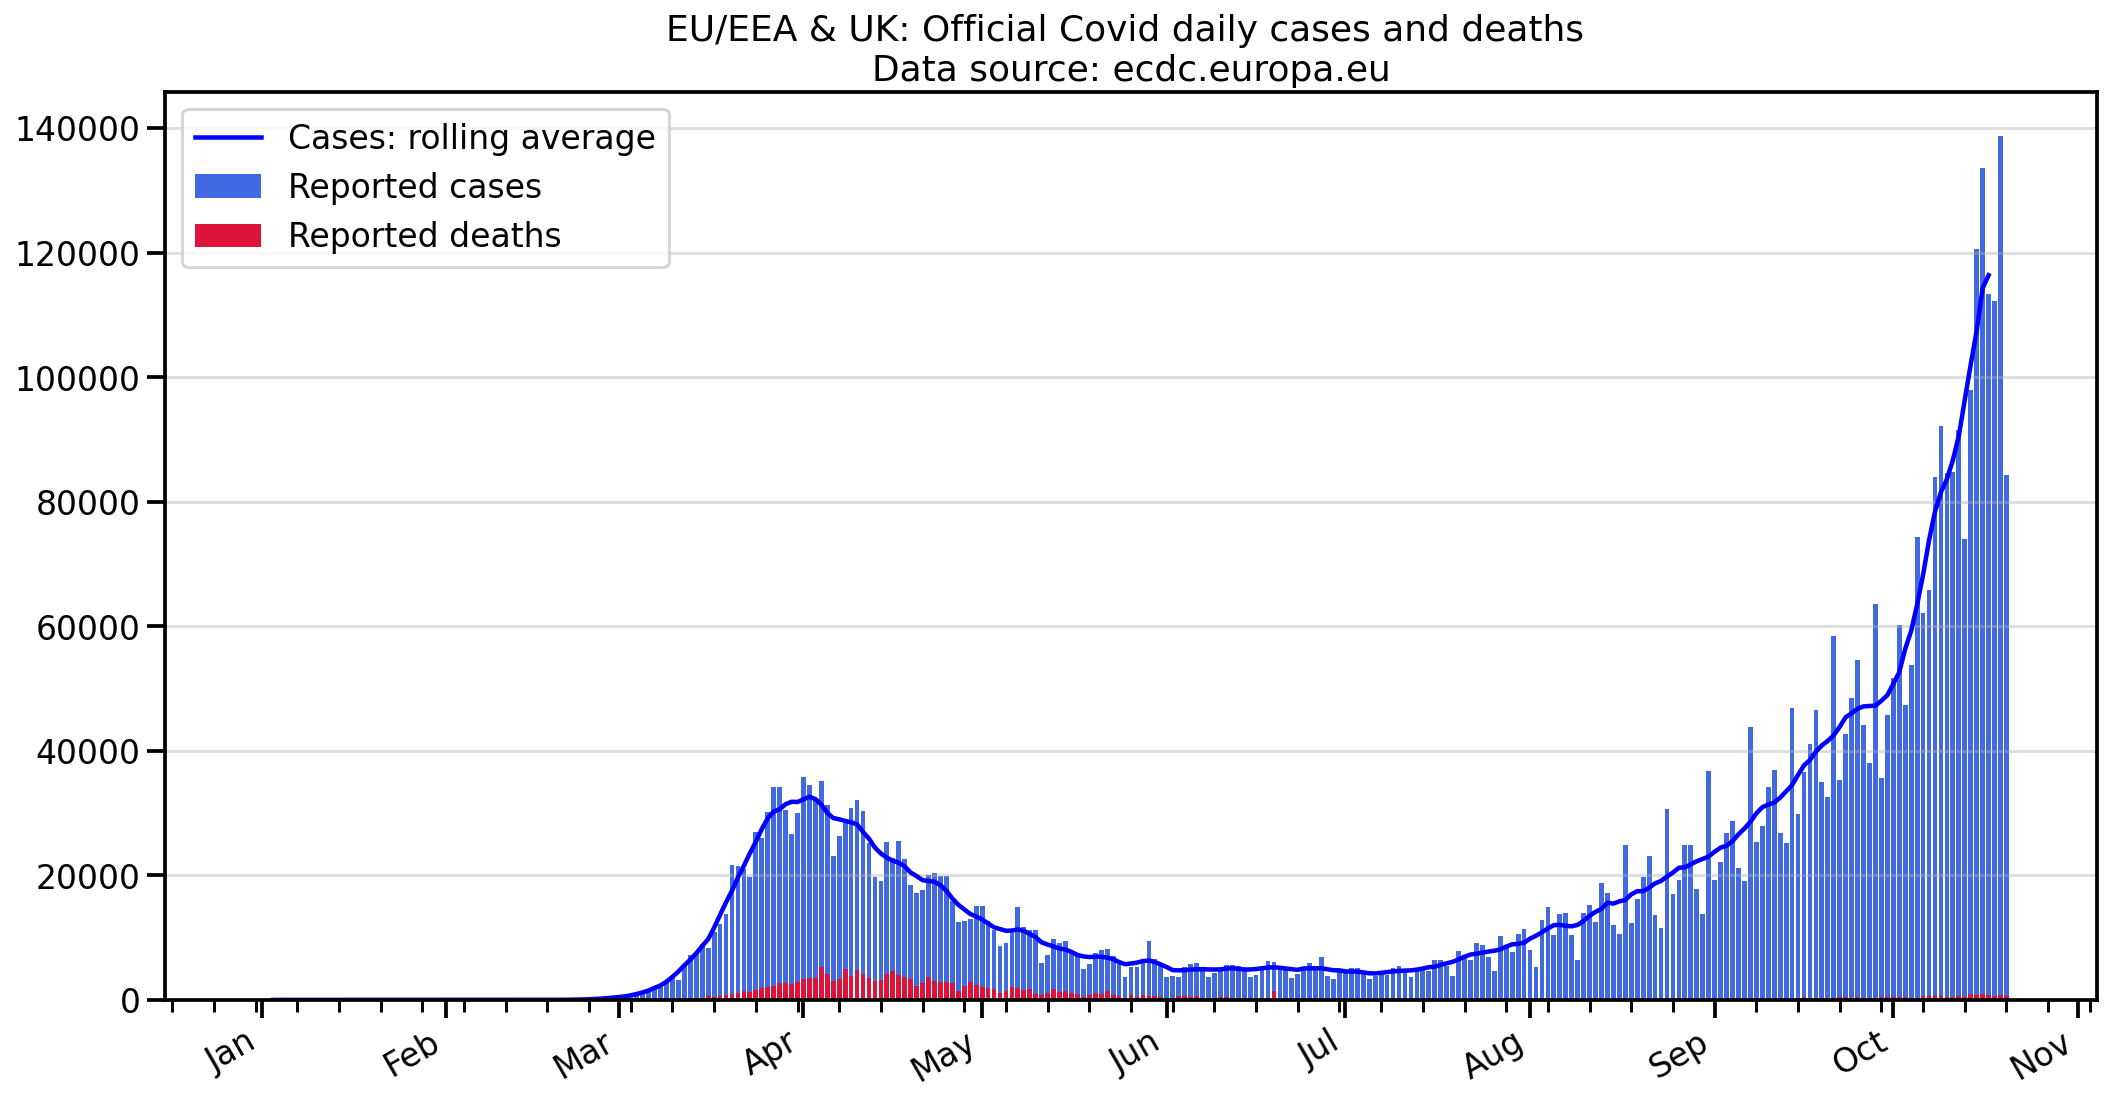

In [25]:
mirrorplot(df,country=country,datasource='Data source: '+ datasource,mirror=False,mynotes=True)

/Users/ivandebono/Desktop/Covid19Toolkit/get_plots.py:204: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


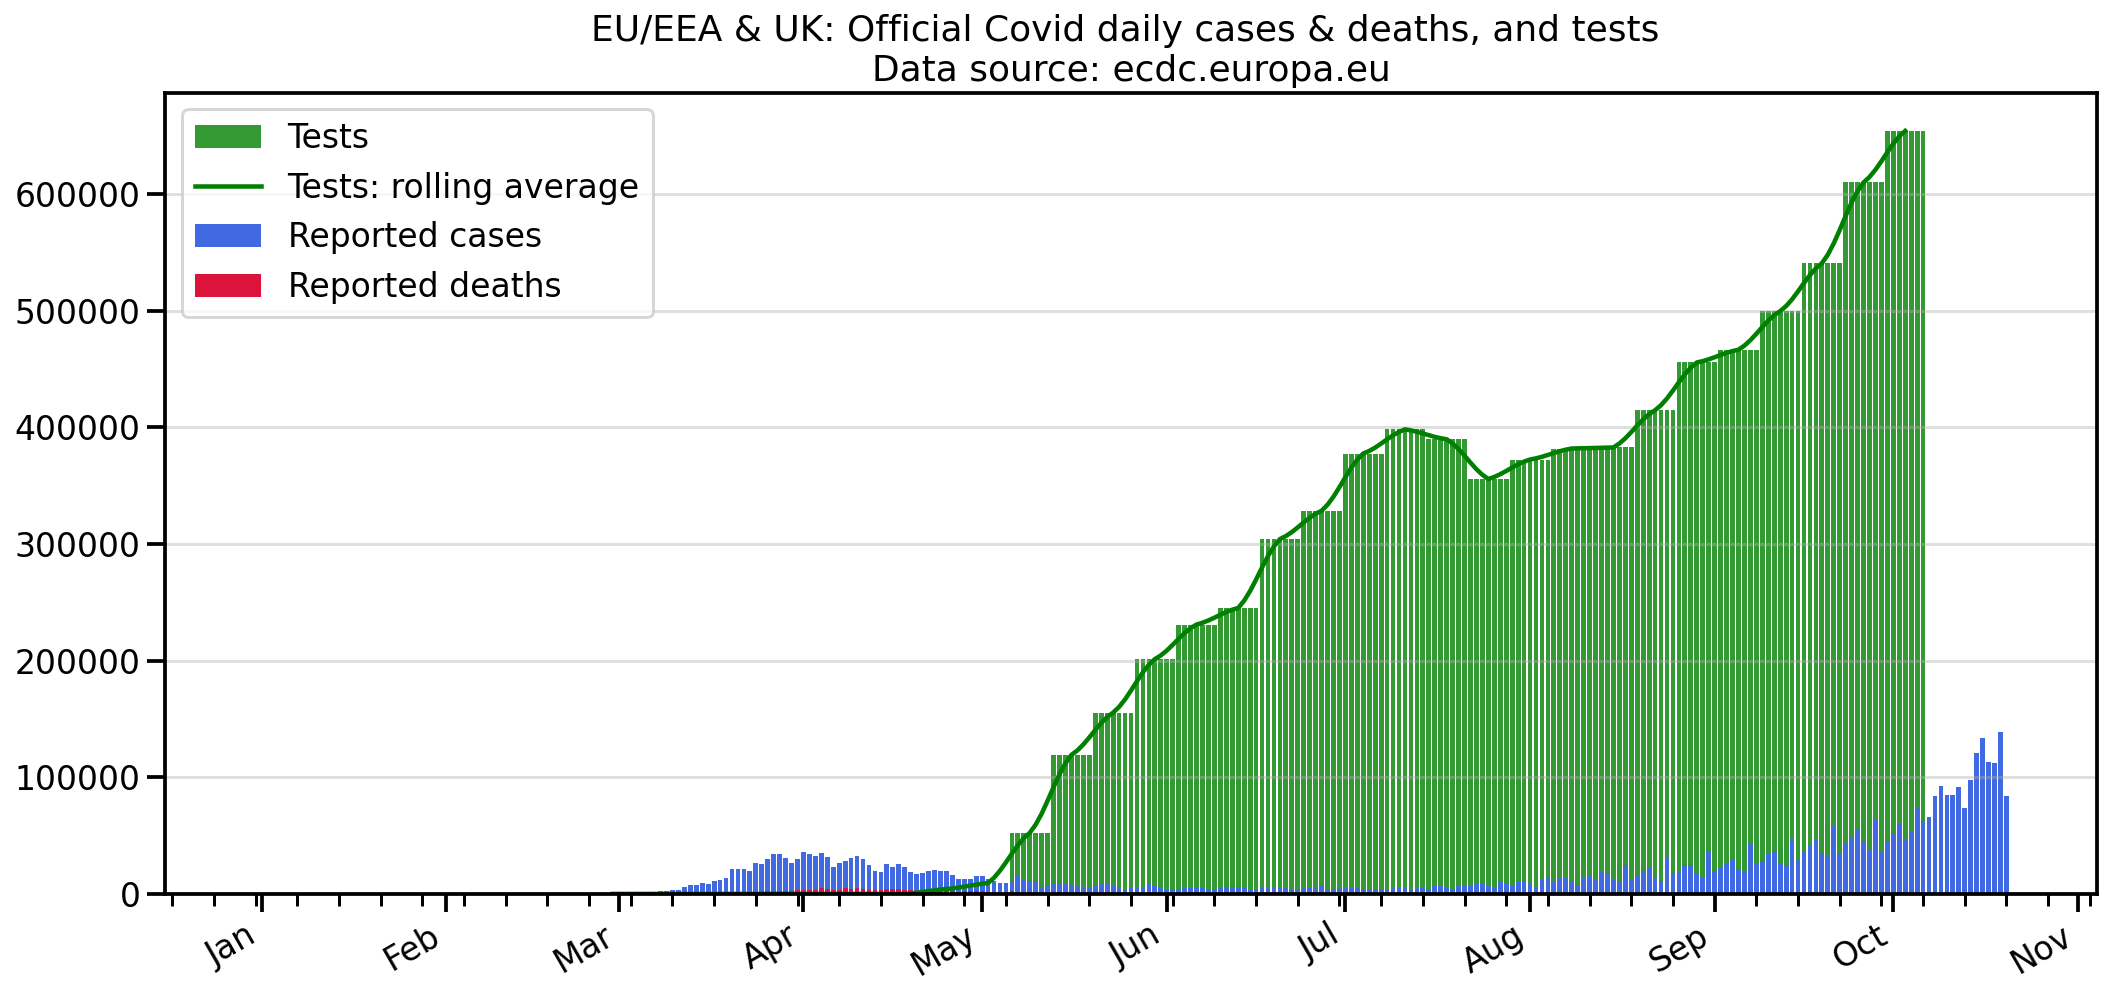

In [26]:
mirrorplot_withtest(df,df,country=country,datasource='Data source: '+ datasource,mirror=False,mynotes=True)

In [29]:
df.dropna(inplace=True)
df.drop(df[df.total<df.positive].index,inplace=True)

In [30]:
obs_positive_trace,data=mk_true_positive(df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sp, se, pi]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 726 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [31]:
df_true=mk_hpd(obs_positive_trace,data)


/Users/ivandebono/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


/Users/ivandebono/Desktop/Covid19Toolkit/get_plots.py:127: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


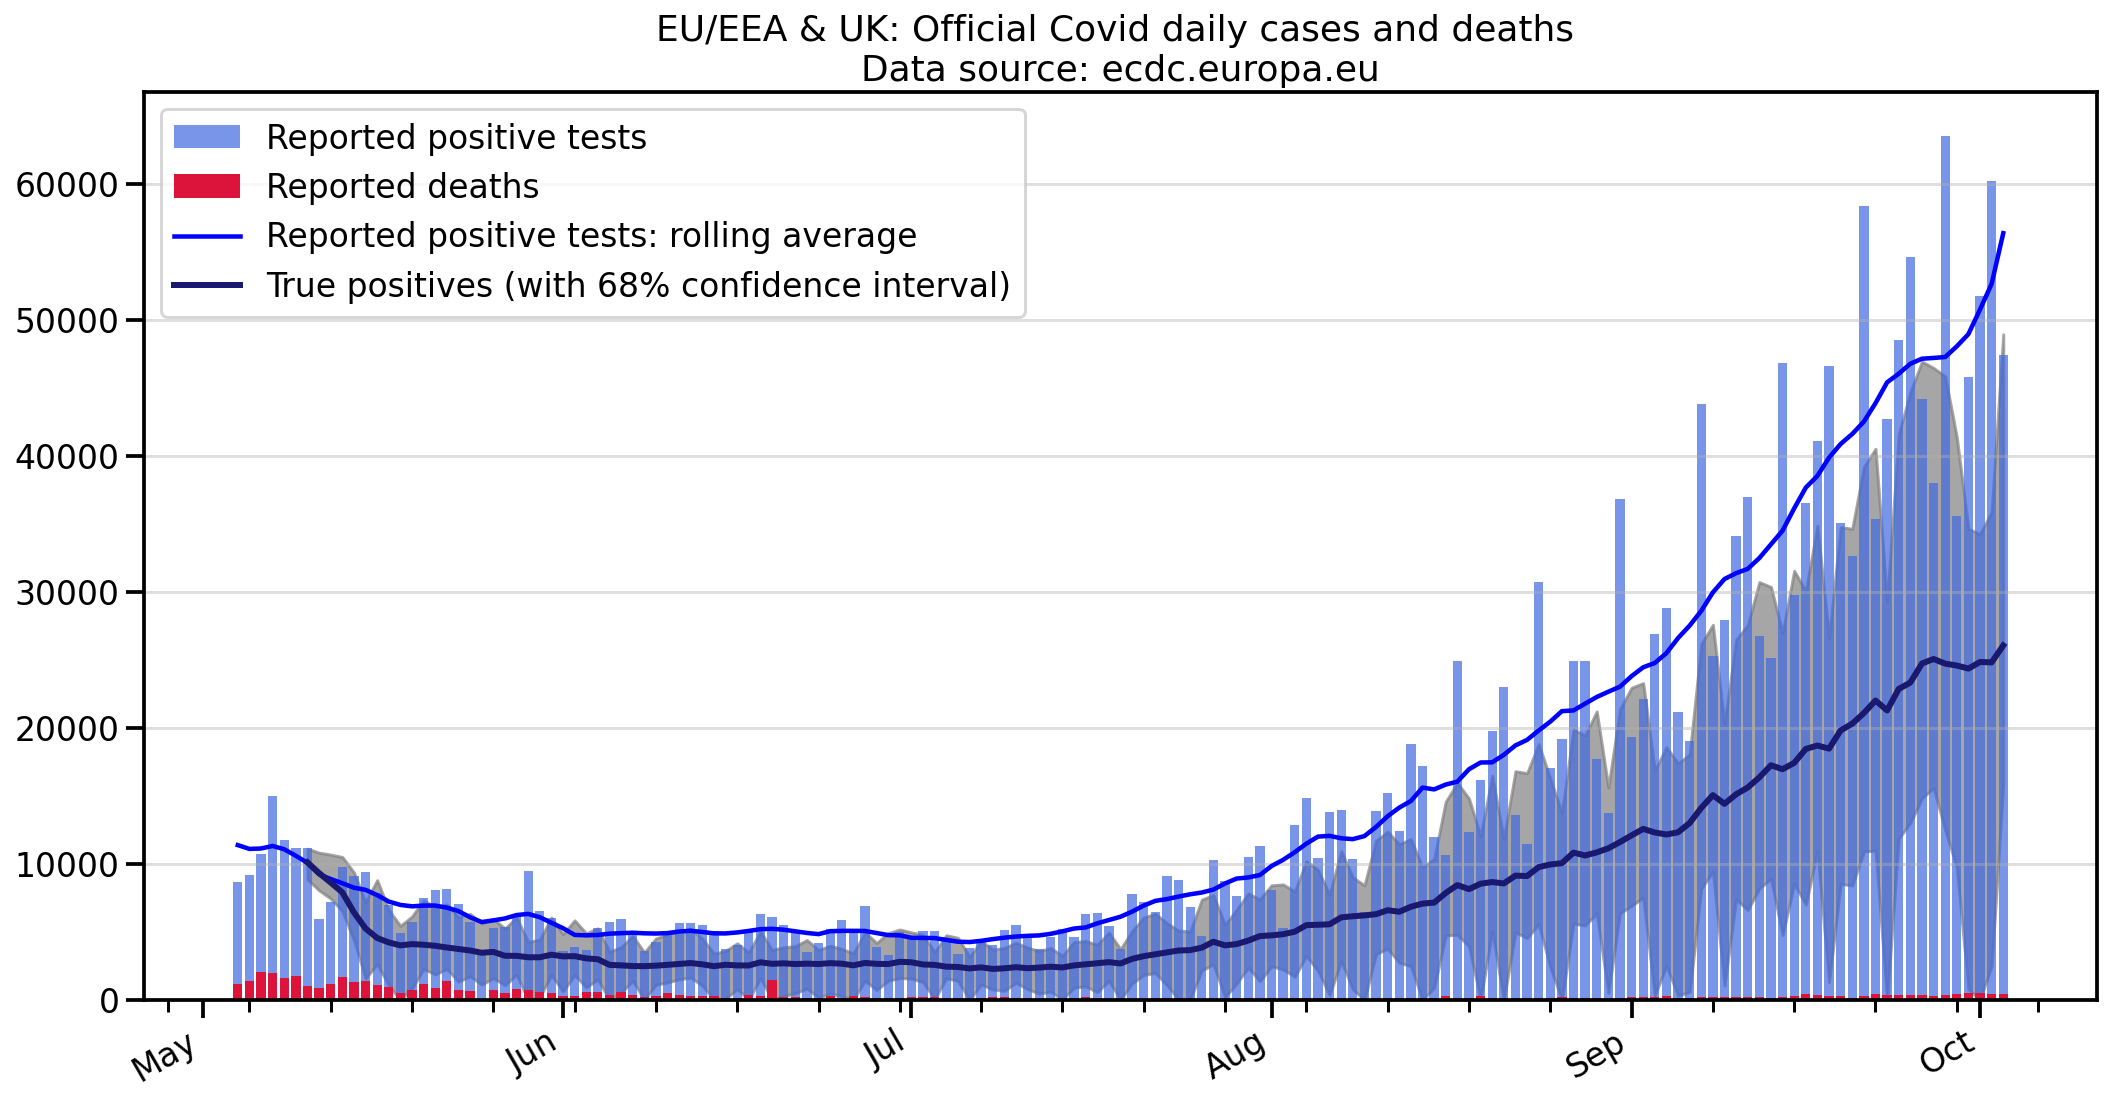

In [32]:
plot_fpr(df, df_true,country=country,
           datasource='Data source: '+datasource,mynotes=True) 